# Выбор модели Re-Identification

## Подготовка данных

In [1]:
import os

import torch
import torchvision.transforms.functional as F
from PIL import Image

In [2]:
file_paths = []
directory = 'data/test'

for entry in os.listdir(directory):
    full_path = os.path.join(directory, entry)
    if os.path.isfile(full_path):
        file_paths.append(entry)

In [3]:
class_list = [int(c[:4]) for c in file_paths]

In [4]:
import torchvision.transforms.functional as F
from PIL import Image

In [5]:
imgs = []
for file_name in file_paths:
    img = Image.open(os.path.join(directory, file_name)).convert('RGB')
    img_t = F.to_tensor(img)
    imgs.append(img_t)

In [6]:
imgs_t = torch.stack(imgs, dim=0)

In [7]:
imgs_t.shape

torch.Size([157, 3, 128, 64])

### Нормализация

In [8]:
imgs_t.view(3, -1).mean(dim=1), imgs_t.view(3, -1).std(dim=1)

(tensor([0.3985, 0.4075, 0.4186]), tensor([0.2226, 0.2244, 0.2333]))

In [9]:
imgs_t = F.normalize(imgs_t, [0.3985, 0.4075, 0.4186], [0.2226, 0.2244, 0.2333])

## Тесты моделей

In [1]:
import torch

import clothclassify.models

### mobilenetv2_x1_4

In [11]:
model = models.build_model('mobilenetv2_x1_4', 751, 'triplet',pretrained=False)

In [12]:
from collections import OrderedDict

def fix_state_dict(state_dict):
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k[7:] if k.startswith('module.') else k  # удаляем 'module.' если есть
        new_state_dict[name] = v
    return new_state_dict

In [13]:
state_dict = torch.load('checkpoint/mobilenetv2_1dot4_market.pth.tar', weights_only=False)

In [14]:
state_dict = fix_state_dict(state_dict)

In [15]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [16]:
res = model(imgs_t)

### Проекция TSNE

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [19]:
X = res[1].cpu().detach().numpy()

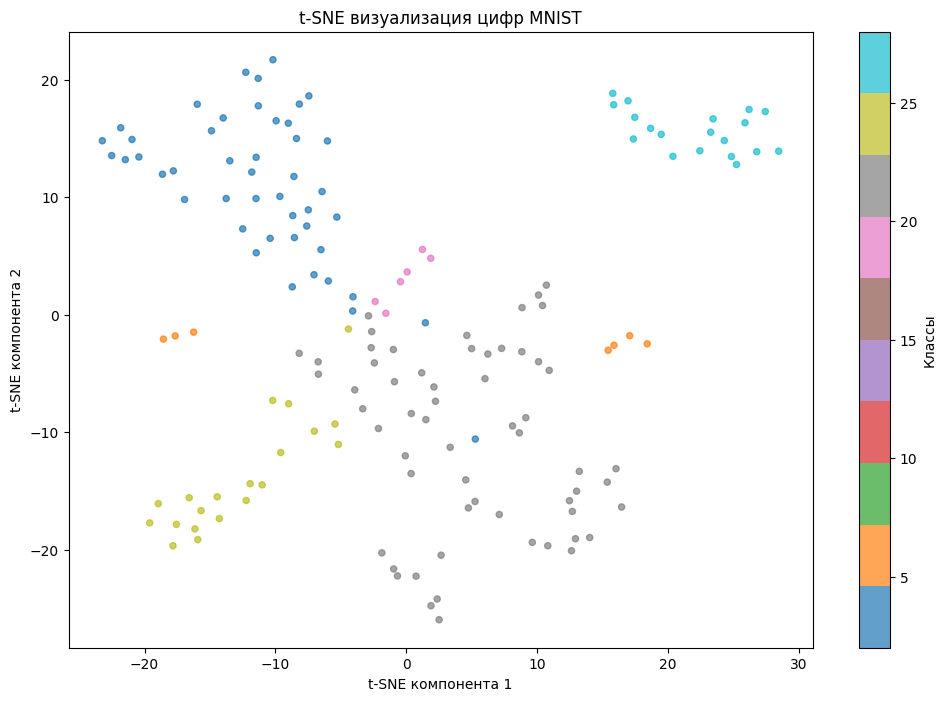

In [20]:
tsne = TSNE(n_components=2, random_state=42, perplexity=13)
X_tsne = tsne.fit_transform(X)

# Визуализируем с цветами по классам
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=class_list, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title('t-SNE визуализация цифр MNIST')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

### Osnet x1.0 market

In [21]:
model = models.build_model('osnet_x1_0', 751, 'triplet', pretrained=False)

In [22]:
from collections import OrderedDict

def fix_state_dict(state_dict):
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k[7:] if k.startswith('module.') else k  # удаляем 'module.' если есть
        new_state_dict[name] = v
    return new_state_dict

In [23]:
state_dict = torch.load('checkpoint/osnet_x1_0_market_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip.pth', weights_only=False)

In [24]:
state_dict = fix_state_dict(state_dict)

In [25]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [26]:
res = model(imgs_t)

### Проекция TSNE

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [28]:
X = res[1].cpu().detach().numpy()

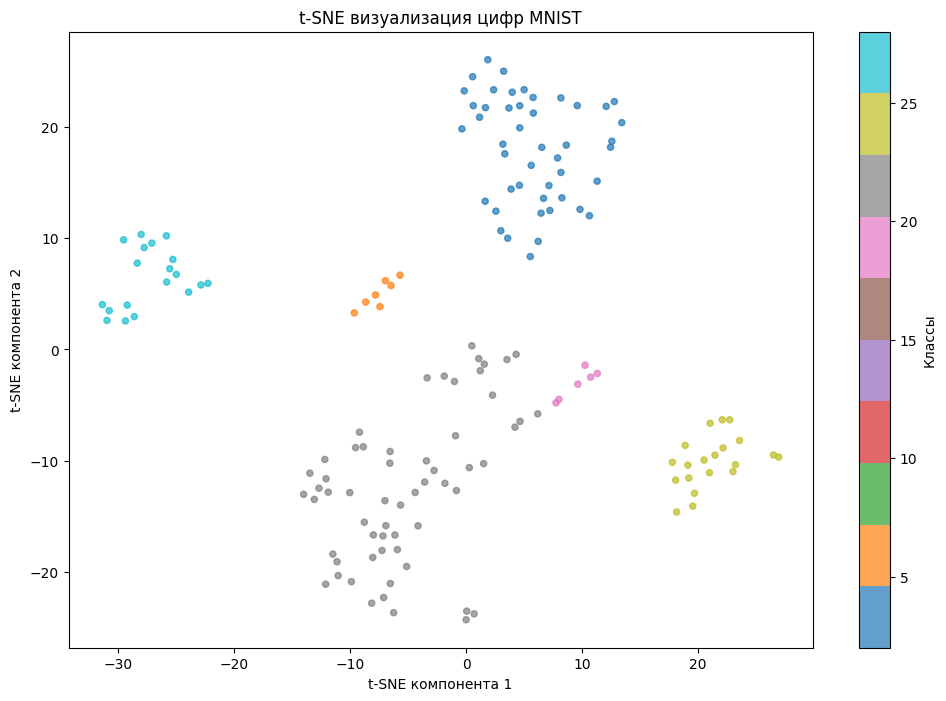

In [29]:
tsne = TSNE(n_components=2, random_state=42, perplexity=13)
X_tsne = tsne.fit_transform(X)

# Визуализируем с цветами по классам
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=class_list, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title('t-SNE визуализация цифр MNIST')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

### Osnet_ain x1.0 MS+D+C

In [30]:
model = models.build_model('osnet_ain_x1_0', 2510, 'triplet', pretrained=False)

In [31]:
from collections import OrderedDict

def fix_state_dict(state_dict):
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k[7:] if k.startswith('module.') else k  # удаляем 'module.' если есть
        new_state_dict[name] = v
    return new_state_dict

In [32]:
state_dict = torch.load('checkpoint/osnet_ain_ms_d_c.pth.tar', weights_only=False)

In [33]:
state_dict.keys()

dict_keys(['state_dict', 'epoch', 'rank1', 'optimizer', 'scheduler'])

In [34]:
state_dict = fix_state_dict(state_dict['state_dict'])

In [35]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [36]:
res = model(imgs_t)

### Проекция TSNE

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [38]:
X = res[1].cpu().detach().numpy()

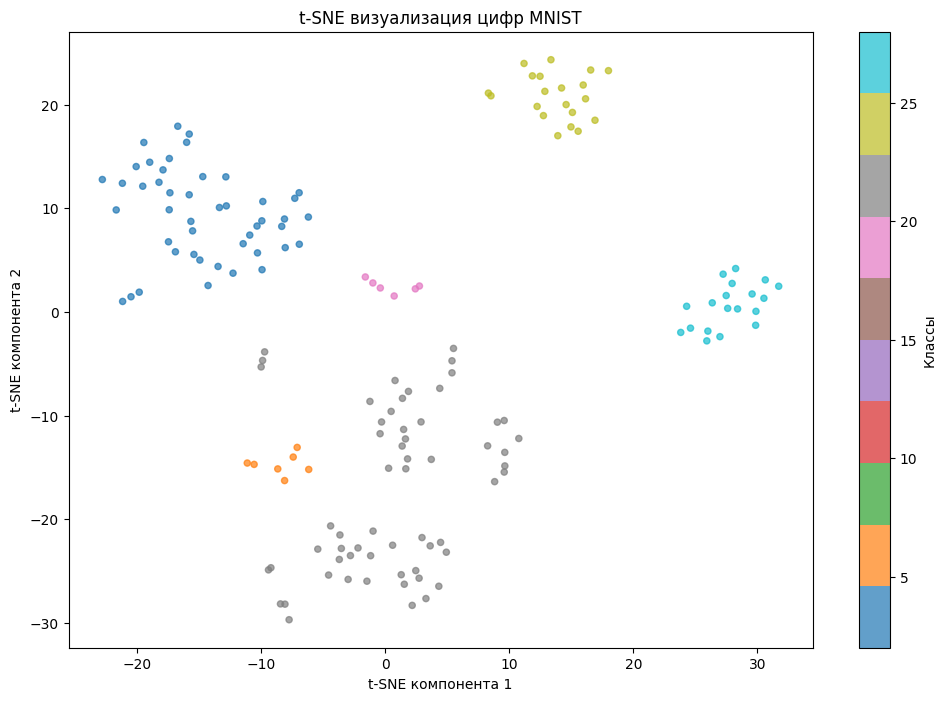

In [39]:
tsne = TSNE(n_components=2, random_state=42, perplexity=13)
X_tsne = tsne.fit_transform(X)

# Визуализируем с цветами по классам
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=class_list, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title('t-SNE визуализация цифр MNIST')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

### osnet_ibn_x1_0 market

In [40]:
model = models.build_model('osnet_ibn_x1_0', 751, 'triplet', pretrained=False)

In [41]:
from collections import OrderedDict

def fix_state_dict(state_dict):
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k[7:] if k.startswith('module.') else k  # удаляем 'module.' если есть
        new_state_dict[name] = v
    return new_state_dict

In [42]:
state_dict = torch.load('checkpoint/osnet_ibn_x1_0_market1501_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip_jitter.pth', weights_only=False)

In [43]:
state_dict.keys()

odict_keys(['conv1.conv.weight', 'conv1.bn.weight', 'conv1.bn.bias', 'conv2.0.conv1.conv.weight', 'conv2.0.conv1.bn.weight', 'conv2.0.conv1.bn.bias', 'conv2.0.conv1.bn.running_mean', 'conv2.0.conv1.bn.running_var', 'conv2.0.conv1.bn.num_batches_tracked', 'conv2.0.conv2a.conv1.weight', 'conv2.0.conv2a.conv2.weight', 'conv2.0.conv2a.bn.weight', 'conv2.0.conv2a.bn.bias', 'conv2.0.conv2a.bn.running_mean', 'conv2.0.conv2a.bn.running_var', 'conv2.0.conv2a.bn.num_batches_tracked', 'conv2.0.conv2b.0.conv1.weight', 'conv2.0.conv2b.0.conv2.weight', 'conv2.0.conv2b.0.bn.weight', 'conv2.0.conv2b.0.bn.bias', 'conv2.0.conv2b.0.bn.running_mean', 'conv2.0.conv2b.0.bn.running_var', 'conv2.0.conv2b.0.bn.num_batches_tracked', 'conv2.0.conv2b.1.conv1.weight', 'conv2.0.conv2b.1.conv2.weight', 'conv2.0.conv2b.1.bn.weight', 'conv2.0.conv2b.1.bn.bias', 'conv2.0.conv2b.1.bn.running_mean', 'conv2.0.conv2b.1.bn.running_var', 'conv2.0.conv2b.1.bn.num_batches_tracked', 'conv2.0.conv2c.0.conv1.weight', 'conv2.0.con

In [44]:
state_dict = fix_state_dict(state_dict)

In [45]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [46]:
res = model(imgs_t)

### Проекция TSNE

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [48]:
X = res[1].cpu().detach().numpy()

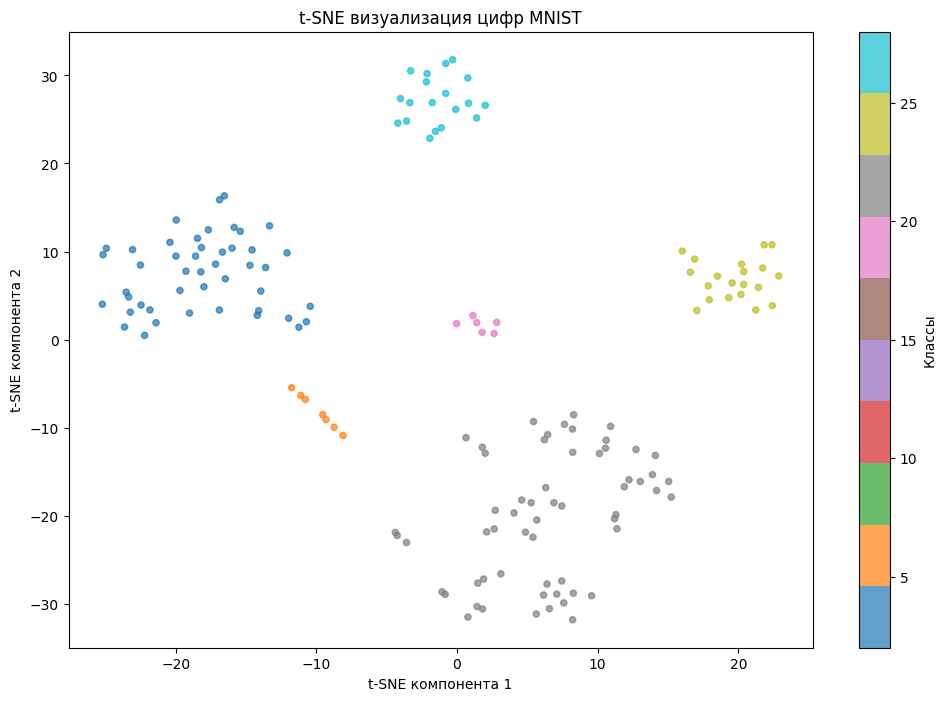

In [49]:
tsne = TSNE(n_components=2, random_state=42, perplexity=13)
X_tsne = tsne.fit_transform(X)

# Визуализируем с цветами по классам
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=class_list, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title('t-SNE визуализация цифр MNIST')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

### hacnn x1.0 market

In [11]:
model = models.build_model('hacnn', 751, 'triplet', pretrained=False)

In [12]:
from collections import OrderedDict

def fix_state_dict(state_dict):
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k[7:] if k.startswith('module.') else k  # удаляем 'module.' если есть
        new_state_dict[name] = v
    return new_state_dict

In [13]:
state_dict = torch.load('checkpoint/hacnn_market_xent.pth.tar', weights_only=False, encoding='latin1')

In [14]:
state_dict.keys()

dict_keys(['rank1', 'state_dict', 'epoch'])

In [15]:
state_dict = fix_state_dict(state_dict['state_dict'])

In [16]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [17]:
model = model.to('cuda')

In [18]:
imgs_t_160 = F.resize(imgs_t, (160,64)).to('cuda')

In [19]:
res = model(imgs_t_160[:100])

/home/himoza/Учеба/Person-embedding-by-cloth/models/hacnn.py:104: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  x = F.upsample(
/home/himoza/miniconda3/envs/person/lib/python3.13/site-packages/torch/nn/functional.py:5167: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/himoza/miniconda3/envs/person/lib/python3.13/site-packages/torch/nn/functional.py:5100: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/himoza/Учеба/Person-embedding-by-cloth/models/hacnn.py:323: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` inste

In [20]:
res_2 = model(imgs_t_160[100:])

### Проекция TSNE

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [22]:
X_1 = res[1][1].cpu().detach().numpy()
X_2 = res_2[1][1].cpu().detach().numpy()

In [23]:
import numpy as np

X = np.concatenate((X_1, X_2))
X.shape

(157, 512)

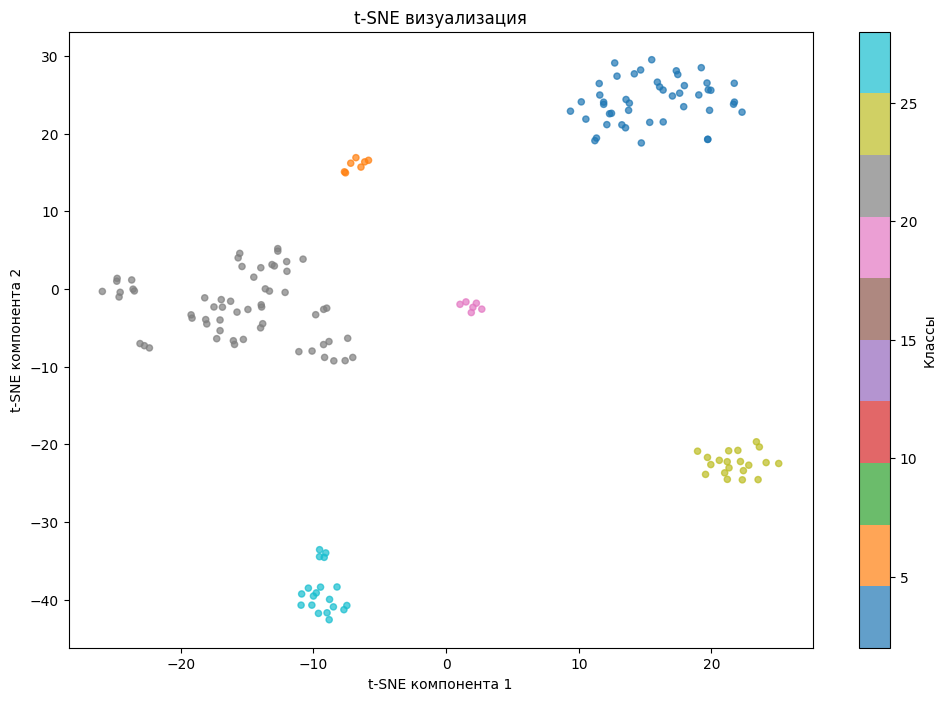

In [24]:
tsne = TSNE(n_components=2, random_state=42, perplexity=13)
X_tsne = tsne.fit_transform(X)

# Визуализируем с цветами по классам
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=class_list, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title('t-SNE визуализация')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()